In [13]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from copy import copy
import json

In [14]:
DATA_PATH = Path('/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datasets/real-test')
datasets = ['perspective', 'rotate']  

In [15]:
full_annots = []
for dataset in datasets:
    
    annot = pd.read_csv(DATA_PATH / dataset / 'annotations.csv')
    images_path = list((DATA_PATH / dataset / 'images').glob('*.jpg'))
    
    # Prepare new annot df
    new_annot = annot[['img', 'kp-1']]
    new_annot.columns = ['filename', 'annotation']
    new_annot['filename'] = new_annot['filename'].apply(lambda x: Path(x).name.split('-')[-1])
    new_annot['filepath'] = new_annot['filename'].apply(lambda x: str(DATA_PATH / dataset / 'images' / x))
    new_annot['width'] = None
    new_annot['height'] = None
    new_annot['coords'] = None
    new_annot = new_annot.reset_index(drop=True)

    # Modify column with annot
    for i in range(new_annot.shape[0]):
        entry = json.loads(new_annot['annotation'].iloc[i])
        coords = [[sample['x'] / 100, sample['y'] / 100] for sample in entry]
        new_annot.loc[i, 'coords'] = coords
        new_annot.loc[i, 'width'] = entry[0]['original_width']
        new_annot.loc[i, 'height'] = entry[0]['original_height']
    new_annot = new_annot.drop('annotation', axis=1)  
    new_annot['dataset'] = dataset
    full_annots.append(new_annot)
full_annots = pd.concat(full_annots).reset_index(drop=True)
full_annots.to_csv(DATA_PATH / f'full_annotations.csv', index=False)

/tmp/ipykernel_11785/812175043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_annot['filename'] = new_annot['filename'].apply(lambda x: Path(x).name.split('-')[-1])
/tmp/ipykernel_11785/812175043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_annot['filepath'] = new_annot['filename'].apply(lambda x: str(DATA_PATH / dataset / 'images' / x))
/tmp/ipykernel_11785/812175043.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [16]:
full_annots

,filename,filepath,width,height,coords,dataset
0,0000.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,3024,4032,"[[0.24174752195742466, 0.28239618059495475], [...",perspective
1,0001.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,3024,4032,"[[0.17100407469521223, 0.244897638536439], [0....",perspective
2,0002.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,3024,4032,"[[0.8149540223239155, 0.22281120686874625], [0...",perspective
3,0003.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,3024,4032,"[[0.18359179023638228, 0.20169396160923228], [...",perspective
4,0004.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,3024,4032,"[[0.2973387911772968, 0.1510268022462388], [0....",perspective
...,...,...,...,...,...,...
333,0165.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,1536,2048,"[[0.3609765365251258, 0.17227130236534638], [0...",rotate
334,0166.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,1536,2048,"[[0.08617510109776783, 0.4340538732750966], [0...",rotate
335,0167.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,1536,2048,"[[0.08774524697217029, 0.5730117831597143], [0...",rotate
336,0168.jpg,/home/bulat/Work/Sirius/DeWrapDoc-12.25/Datase...,1397,1863,"[[0.09501082501219377, 0.6580351822586076], [0...",rotate


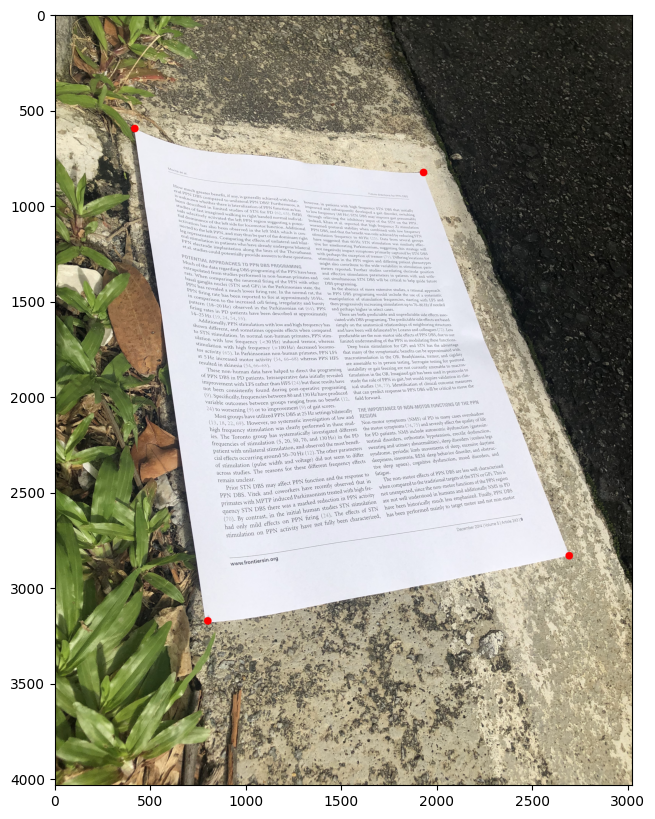

In [18]:
idx = np.random.choice(full_annots.index.tolist())

filepath = full_annots['filepath'].iloc[idx]
filename = full_annots['filename'].iloc[idx]
coords = full_annots['coords'].iloc[idx]
width = full_annots['width'].iloc[idx]
height = full_annots['height'].iloc[idx]

image = cv2.imread(filepath)
for coord in coords:
    x, y = int(coord[0] * width), int(coord[1] * height)
    cv2.circle(image, (x, y), 20, (0,0,255), -1)

plt.figure(figsize=(10, 10))
plt.imshow(image[:,:,::-1])
plt.show();